### The problem

Consider the following poisson's equation:
$$
-T \nabla^{2} D = p
$$
defined over circular domain of radius $R$.

Here, $T$ is a constant, and
$$
p = \frac{A}{2\pi\sigma} \exp\left(-\frac{1}{2} \left(\frac{x-x_{0}}{\sigma}\right)^{2}\right) \exp \left( -\frac{1}{2} \left(\frac{y-y_{0}}{\sigma}\right)^{2}\right)
$$
this is the pressure load modelled as a Gaussian. $\sigma$ is the width of the load. $p$ has an extrema at $(x_{0}, y_{0})$.

We define $D$ to be the displacement field at $(x,y) \in \Omega$.

We can obtain a scaled version of this problem by introducing dimenssionless coordinates and deflection.
$$
\begin{align*}
\overline{x} = x/R &&\overline{y} = y/R &&&w = D/D_{c}
\end{align*}
$$
where $D_{c}$ is 
> the characteristic size of the deflection.

... A bunch of steps is skipped here ...

After scaling, we want to solve 
$$
-\nabla^{2}w = 4\exp\left(-\beta^{2}\left(x^{2} + (y - R_{0})^{2}\right)\right)
$$
over the unit disk, with the Dirichlet boundary condition that $w = 0$ over the boundary.

$\beta$ is the "extent of pressure", $R_{0}$ is the location of the pressure peak (there is rotational symmetry, so a choice of $(0, R_{0})$ is sufficient)

The actual deflection can be obtained from $w$ by 
$$
D = \frac{AR^{2}}{8\pi \sigma T}w
$$


In [56]:
# importing the meshing tool
import mshr as mshr
import dolfin as dfin

In [57]:
domain = mshr.Circle(dfin.Point(0,0), 1)
mesh = mshr.generate_mesh(domain, 64)

In [58]:
p = dfin.Expression(
    "4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))",
    beta = 8,
    R0 = 0.6,
    degree = 1
)

In [59]:
# we can get the values of beta pr R0
print(p.beta)
print(p.R0)

8.0
0.6


In [60]:
V = dfin.FunctionSpace(mesh, "CG", 1)

w = dfin.TrialFunction(V)
v = dfin.TestFunction(V)
a = dfin.dot(dfin.grad(w), dfin.grad(v))*dfin.dx
L = p*v*dfin.dx

In [61]:
def boundary(x, on_boundary):
    return on_boundary

w_D = dfin.Constant(0)
bc = dfin.DirichletBC(V, w_D, boundary) 

In [62]:
w = dfin.Function(V)
dfin.solve(a==L, w, bc)

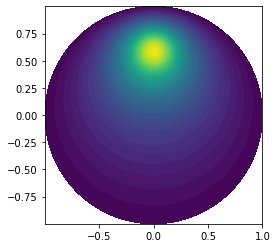

In [63]:
# here we visualize the deflection
dfin.plot(w)

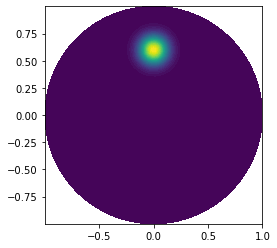

In [64]:
# but we also want to visualize the load
# interpolate the Expression p using basis functions
# p is now a Function, not an Expression
p = dfin.interpolate(p, V)
dfin.plot(p)

In [65]:
vtkfile_w = dfin.File("deflection.pvd")
vtkfile_w << w
vtkfile_p = dfin.File("load.pvd")
vtkfile_p << p

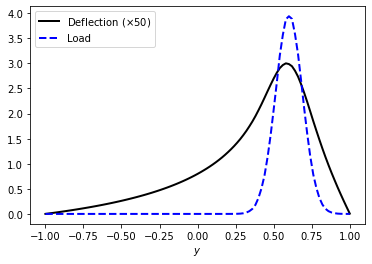

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# add/subtract 0.001 from end points so we dont get points out side the domain
y = np.linspace(-1 + 0.001, 1-0.001, 101)
points = [(0,y_) for y_ in y] 
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, "k", linewidth=2)
plt.plot(y, p_line, 'b--', linewidth=2)
plt.xlabel("$y$")
plt.legend(["Deflection ($\\times 50$)", "Load"])
plt.savefig("sliceplot.pdf")